In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [83]:
from sklearn.linear_model import LogisticRegression

In [332]:
#importing training and testing sets
train = pd.read_csv('train.csv')

In [333]:
test = pd.read_csv('test.csv')

In [5]:
#exploring data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [93]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [294]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


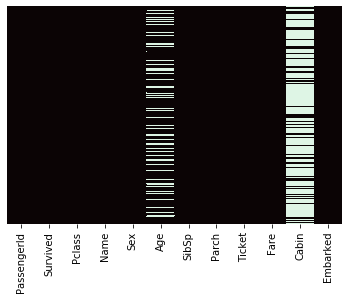

In [15]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'mako' )

In [25]:
train['Age'].isnull().sum()/len(train.index)

0.19865319865319866

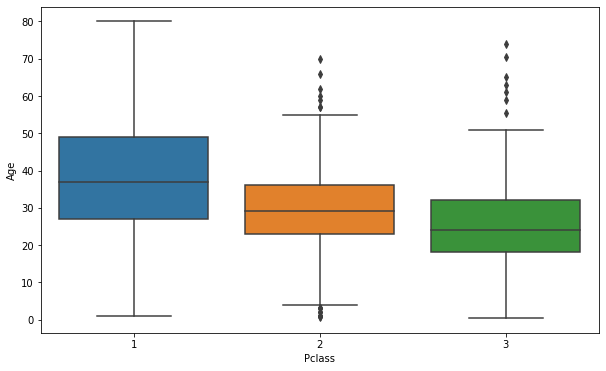

In [36]:
plt.figure(figsize = (10,6))
sns.boxplot(y = 'Age', x = 'Pclass', data = train)

In [258]:
print(train[train['Pclass'] == 1]['Age'].mean())
print(train[train['Pclass'] == 2]['Age'].mean())
print(train[train['Pclass'] == 3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [259]:
print(train[train['Pclass'] == 1]['Age'].median())
print(train[train['Pclass'] == 2]['Age'].median())
print(train[train['Pclass'] == 3]['Age'].median())

37.0
29.0
24.0


In [296]:
#Starting to clean data

## Creating function to fill null values in 'Age' column

def age_fill(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return train[train['Pclass'] == 1]['Age'].median()
        elif Pclass == 2:
            return train[train['Pclass'] == 2]['Age'].median()
        elif Pclass == 3:
            return train[train['Pclass'] == 3]['Age'].median()
    else:
        return Age

In [297]:
train['Age'] = train[['Age', 'Pclass']].apply(age_fill, axis = 1)

In [298]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [299]:
train.drop('Cabin', axis = 1, inplace = True)

In [300]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [301]:
train.dropna(inplace = True)

In [302]:
train.drop('PassengerId', axis = 1, inplace = True)

In [303]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [268]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [304]:
#Transforimng Male and Female in 'Sex' column into dummy variables, Male = 1
train['Sex'] = pd.get_dummies(train['Sex'], drop_first = True)

In [305]:
#Transforming categories in 'Embarked' to dummy variables
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [306]:
#Adding new columns representing 'Embarked' to traing data
train = pd.concat([train, embark], axis = 1)

In [307]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,0,1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,1


In [311]:
train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
Survived,1.000000,-0.335549,-0.541585,-0.052051,-0.034040,0.083151,0.255290,0.004536,-0.151777
Pclass,-0.335549,1.000000,0.127741,-0.405549,0.081656,0.016824,-0.548193,0.220558,0.076466
Sex,-0.541585,0.127741,1.000000,0.083730,-0.116348,-0.247508,-0.179958,-0.075217,0.121405
Age,-0.052051,-0.405549,0.083730,1.000000,-0.242807,-0.170089,0.120938,-0.080875,0.013598
SibSp,-0.034040,0.081656,-0.116348,-0.242807,1.000000,0.414542,0.160887,-0.026692,0.069438
Parch,0.083151,0.016824,-0.247508,-0.170089,0.414542,1.000000,0.217532,-0.081585,0.061512
Fare,0.255290,-0.548193,-0.179958,0.120938,0.160887,0.217532,1.000000,-0.116684,-0.163758
Q,0.004536,0.220558,-0.075217,-0.080875,-0.026692,-0.081585,-0.116684,1.000000,-0.499261
S,-0.151777,0.076466,0.121405,0.013598,0.069438,0.061512,-0.163758,-0.499261,1.000000


In [312]:
#Now need to clean test data through same steps training data was cleaned

def age_fill(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return test[test['Pclass'] == 1]['Age'].median()
        elif Pclass == 2:
            return test[test['Pclass'] == 2]['Age'].median()
        elif Pclass == 3:
            return test[test['Pclass'] == 3]['Age'].median()
    else:
        return Age

In [313]:
test['Age'] = test[['Age', 'Pclass']].apply(age_fill, axis = 1)

In [275]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [314]:
test.drop('Cabin', axis = 1, inplace = True)

In [315]:
#test.dropna(inplace = True)
test['Fare'].fillna(value = test['Fare'].mean(), inplace = True)

In [316]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [279]:
test.drop('PassengerId', axis = 1, inplace = True)

In [317]:
test['Sex'] = pd.get_dummies(test['Sex'], drop_first = True)
embark_test = pd.get_dummies(test['Embarked'], drop_first = True)
test = pd.concat([test, embark_test], axis = 1)

In [319]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S,0,1


In [318]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,0,1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,1


In [157]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Q', 'S'],
      dtype='object')

In [320]:
#Keeping neccessary columns for final data set, and seperating 'Survived' column to be predicted on

X_train = train[['Pclass', 'Sex', 'Age','Fare', 'Q', 'S']]
y_train = train['Survived']

X_test = test[['Pclass', 'Sex', 'Age','Fare', 'Q', 'S']]

In [321]:
X_train.head()

,Pclass,Sex,Age,Fare,Q,S
0,3,1,22.0,7.2500,0,1
1,1,0,38.0,71.2833,0,0
2,3,0,26.0,7.9250,0,1
3,1,0,35.0,53.1000,0,1
4,3,1,35.0,8.0500,0,1


In [322]:
X_test.head()

,Pclass,Sex,Age,Fare,Q,S
0,3,1,34.5,7.8292,1,0
1,3,0,47.0,7.0000,0,1
2,2,1,62.0,9.6875,1,0
3,3,1,27.0,8.6625,0,1
4,3,0,22.0,12.2875,0,1


In [323]:
model = LogisticRegression()

In [324]:
model.fit(X_train, y_train)

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [325]:
predictions = model.predict(X_test)

In [326]:
len(predictions)

418

In [327]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [288]:
passengerId = np.arange(892,1310)

In [328]:
submission = pd.DataFrame({'PassengerId': passengerId, 'Survived': predictions}, columns=['PassengerId', 'Survived'])

In [329]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [330]:
#Creating CSV file for Kaggle submission
submission.to_csv('submission3.csv', index = False, header = True)

In [ ]:
# Submission notes
## Submission score: 0.76315